## Importing dependencies and environmental variables

In [21]:
# Dependencies
import csv as csv
import http.client 
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pprint
import psycopg2
import requests
import sqlalchemy
from bs4 import BeautifulSoup as bs
from dotenv import load_dotenv
from functools import reduce
from selenium import webdriver
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sodapy import Socrata
from splinter import Browser
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, Float, Date

In [2]:
# Loading homeowrk7.env so that the environment variables can be used in the engine object url
load_dotenv("project3.env")
# Initializing variables to hold each environmet varaible
username=os.environ.get("USERNAME")
password=os.environ.get("PASSWORD")
host=os.environ.get("HOST")
port=os.environ.get("PORT")
database=os.environ.get("DATABASE")
google_key = os.environ.get('GOOGLE_API_KEY')
yelp_client_id = os.environ.get('YELP_CLIENT_ID')
yelp_key = os.environ.get('YELP_API_KEY')
sf_data_key = os.environ.get('SFDATAAPPTOKEN')
acs_5yr_key = os.environ.get('ACS_5YR_KEY')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Reading in csv

In [63]:
hist_complete_data = pd.read_csv("data/complete_data/hist_complete_data.csv")
complete_data = pd.read_csv("data/complete_data/complete_data.csv")

In [64]:
hist_complete_data[hist_complete_data["zip_code"] == 94103]

,year,zip_code,pct_wht,pct_25_34,pct_college_deg,num_coffee_shops,next_years_price
86,2011,94103,47.326741,20.906639,31.265785,18,6.343583e+05
225,2012,94103,47.082689,20.954452,34.146137,18,7.264917e+05
364,2013,94103,46.003263,19.705526,33.262224,17,8.276417e+05
503,2014,94103,45.267131,19.279907,35.697694,20,9.436083e+05
642,2015,94103,44.765313,20.490353,37.911884,22,9.571417e+05
781,2016,94103,45.632501,22.200645,39.958053,24,9.671667e+05
920,2017,94103,41.730270,23.660615,40.681734,24,1.003433e+06


In [65]:
complete_data[complete_data["zip_code"] == 94103]

,year,zip_code,pct_wht,pct_25_34,pct_college_deg,num_coffee_shops,next_years_price
86,2011,94103,47.326741,20.906639,31.265785,0,6.343583e+05
225,2012,94103,47.082689,20.954452,34.146137,0,7.264917e+05
364,2013,94103,46.003263,19.705526,33.262224,-1,8.276417e+05
503,2014,94103,45.267131,19.279907,35.697694,2,9.436083e+05
642,2015,94103,44.765313,20.490353,37.911884,4,9.571417e+05
781,2016,94103,45.632501,22.200645,39.958053,6,9.671667e+05
920,2017,94103,41.730270,23.660615,40.681734,6,1.003433e+06


## Initialzing X and y variables for the historic coffee data model

In [66]:
hist_complete_data = hist_complete_data[complete_data["next_years_price"] != 0]

In [67]:
X = hist_complete_data[["pct_wht", "pct_25_34", "pct_college_deg", "num_coffee_shops"]]
y = hist_complete_data["next_years_price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (910, 4) (910, 1)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [69]:
model = LinearRegression()

In [70]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.450899232616634
Testing Score: 0.45609212483123274


Text(0.5, 1.0, 'Residual Plot')

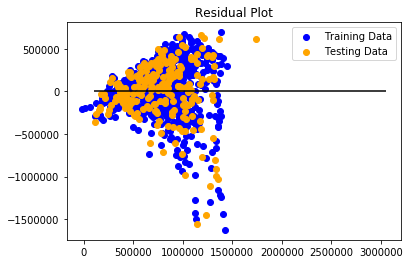

In [71]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

## Initialzing X and y variables for the non-historic coffee data model

In [72]:
complete_data = complete_data[complete_data["next_years_price"] != 0]

In [73]:
X = complete_data[["pct_wht", "pct_25_34", "pct_college_deg", "num_coffee_shops"]]
y = complete_data["next_years_price"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (910, 4) (910, 1)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
model = LinearRegression()

In [76]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4513907463797298
Testing Score: 0.45708689877927017


Text(0.5, 1.0, 'Residual Plot')

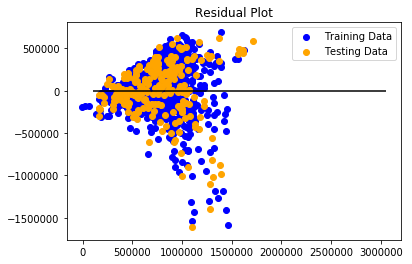

In [77]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")